In [6]:
import torch
import LightroomSettings as ls
import os
import matplotlib.pyplot as plt
import numpy as np



In [7]:
device = torch.device("cuda" if torch.cuda.is_available() else "mps" if torch.backends.mps.is_available() else "cpu")
print(f"Detected {device} device")
model_path = "base.pth"


model_params = {
    'device': device,
    'path': model_path,
    'force_training': True,
}

training_params = {
    'learning rate' : 0.0005,
    'num_epochs' : 10, 
    'criterion' : torch.nn.MSELoss(),
    'device' : device,
    'optimizer' : torch.optim.Adam,
    'log_training_to_console': True,
    'pretrained': True,
    'total_combinations': 0,
    'iterations': 0
}

data_params = {
    'batch_size': 12,
    'num_of_dataloader_workers': 0,
    'shuffle_dataset': True,
    'flip_directions': [], #['rot90', 'rot180', 'rot270','horizontal', 'rot90h', 'rot180h', 'rot270h'],
    'force_preprocessing': False,
    'random_cropping' : 0,
    'cropping_scale' : 0.85,
    'perspective_transform' : 0,
    'distortion_scale' : 0.2,
    'elastic_transform' : [], #[50.0,100.0,150.0,200.0]
    'gauss' : 0,
    'sigma' : (0.1,5.0),
    'validation_split' : [0.80, 0.20],
    "grid_mask": 0,
    "grid_param":{"ratio":0.6, "d_min":30, "d_max":70},
    "local_rotation":0,
    "smooth_config": [{'method': None}], #[{'method':'moving_average','window_size':2, 'sigma':0.5},{'method':'gaussian','window_size':2, 'sigma':0.5},{'method':'moving_average','window_size':0, 'sigma':0.5}]
}

Detected cuda device


In [8]:
if os.path.exists(model_path) and model_params['force_training'] == False:
    model = ls.init_model(model_params)
else:

    data_loader, val_loader = ls.load_data('../data', data_params)

    model, loss, val_loss_array = ls.trainer(model_params, training_params, data_loader, val_loader)

Loading tensors from file
Starting training


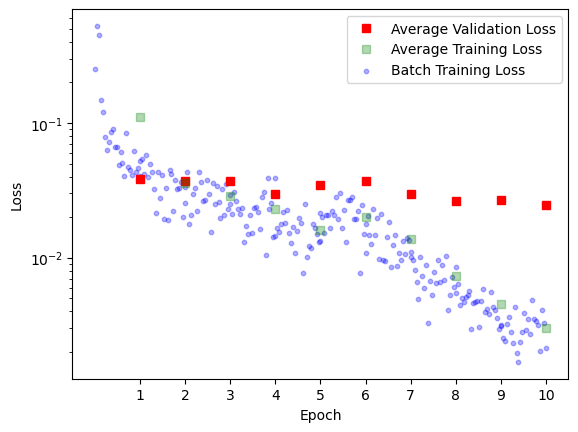

<Figure size 7680x5760 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [9]:
# Convert lists of lists to numpy arrays
loss_array = np.array(loss)
val_loss_array = np.array(val_loss_array)

# Calculate the average of subarrays in loss
loss_avg = np.mean(loss_array, axis=1)

# Calculate the average of subarrays in val_loss_array
val_loss_avg = np.mean(val_loss_array, axis=1)

# Flatten the arrays to plot all individual points
loss_flat = loss_array.flatten()

# Create an array for epochs
epochs = np.arange(1, len(loss_avg) + 1)

# Create an extended epochs array for individual points
extended_epochs = np.repeat(epochs, loss_array.shape[1])

# Calculate the linear spacing within each epoch for the loss points
num_points_per_epoch = loss_array.shape[1]
linear_spacing_within_epoch = np.linspace(-1, 0, num_points_per_epoch)

# Create an array for the x-coordinates of individual loss points
loss_x_coords = np.concatenate([epoch + linear_spacing_within_epoch for epoch in epochs])

plt.plot(epochs, val_loss_avg, label='Average Validation Loss', marker='s' , linestyle='', color='red')
plt.plot(epochs, loss_avg, label='Average Training Loss', marker='s' , linestyle='', color='green', alpha=0.3)

# Scatter plot for individual loss elements
plt.scatter(loss_x_coords, loss_flat, color='blue', alpha=0.3, s=10, label='Batch Training Loss')

plt.xlabel('Epoch')
plt.yscale('log')
plt.ylabel('Loss')

# Set the x-axis ticks to display discrete integer steps
plt.xticks(epochs)

# Only show one label for the scatter plot elements in the legend
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
plt.figure(dpi=1200)
plt.show()
